# Predicting Customer Purchases

Dataset: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset/data

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
customer = pd.read_csv("customer_purchase_data.csv")
df = customer.copy()

In [3]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,44.298667,15.537259,18.000000,31.000000,45.000000,57.000000,70.000000
Gender,1500.0,0.504667,0.500145,0.000000,0.000000,1.000000,1.000000,1.000000
AnnualIncome,1500.0,84249.164338,37629.493078,20001.512518,53028.979155,83699.581476,117167.772858,149785.176481
NumberOfPurchases,1500.0,10.420000,5.887391,0.000000,5.000000,11.000000,15.000000,20.000000
ProductCategory,1500.0,2.012667,1.428005,0.000000,1.000000,2.000000,3.000000,4.000000
TimeSpentOnWebsite,1500.0,30.469040,16.984392,1.037023,16.156700,30.939516,44.369863,59.991105
LoyaltyProgram,1500.0,0.326667,0.469151,0.000000,0.000000,0.000000,1.000000,1.000000
DiscountsAvailed,1500.0,2.555333,1.705152,0.000000,1.000000,3.000000,4.000000,5.000000
PurchaseStatus,1500.0,0.432000,0.495520,0.000000,0.000000,0.000000,1.000000,1.000000


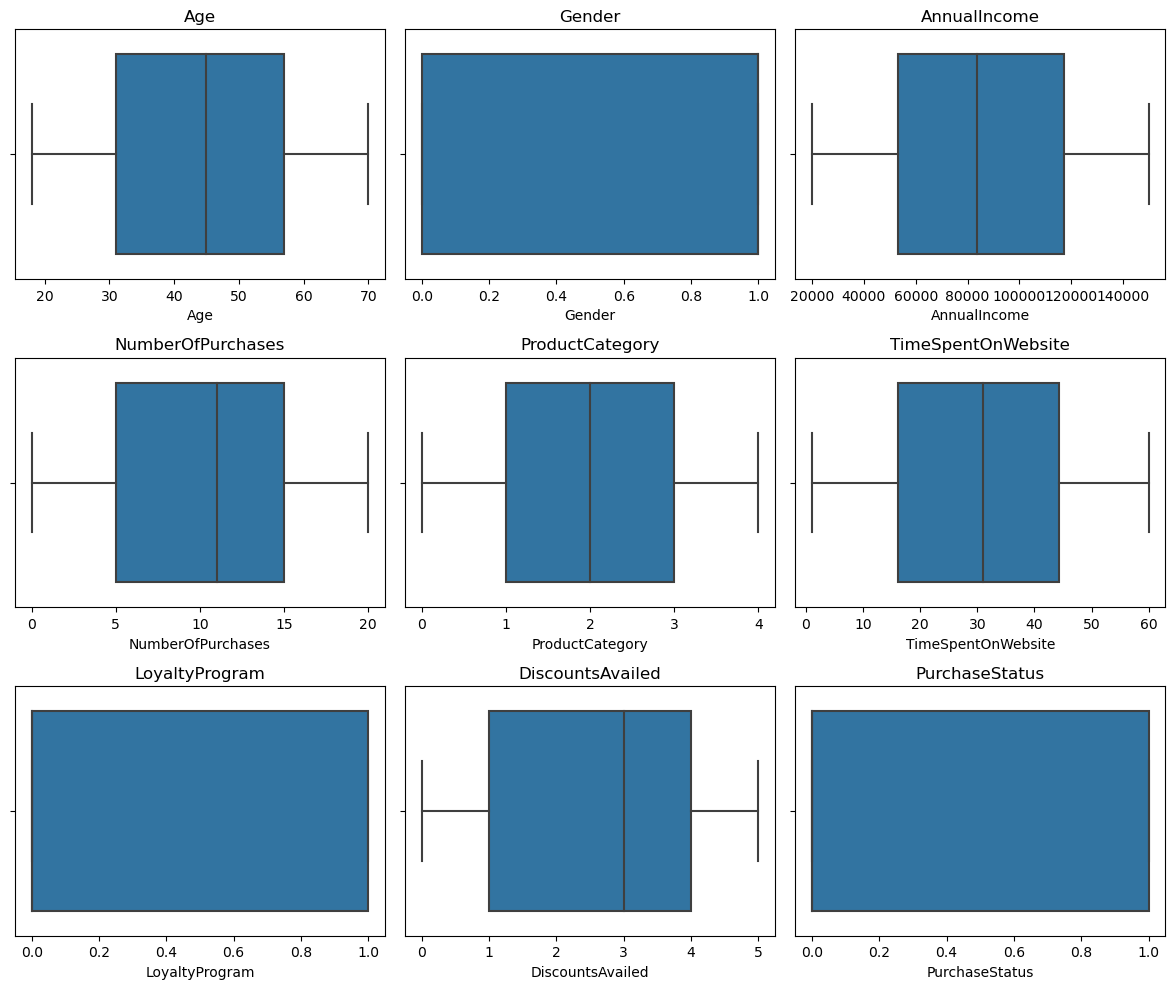

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)
    
plt.tight_layout()
plt.show()

In [7]:
# There are no outliers as it seems.

## Analyzing Relationships

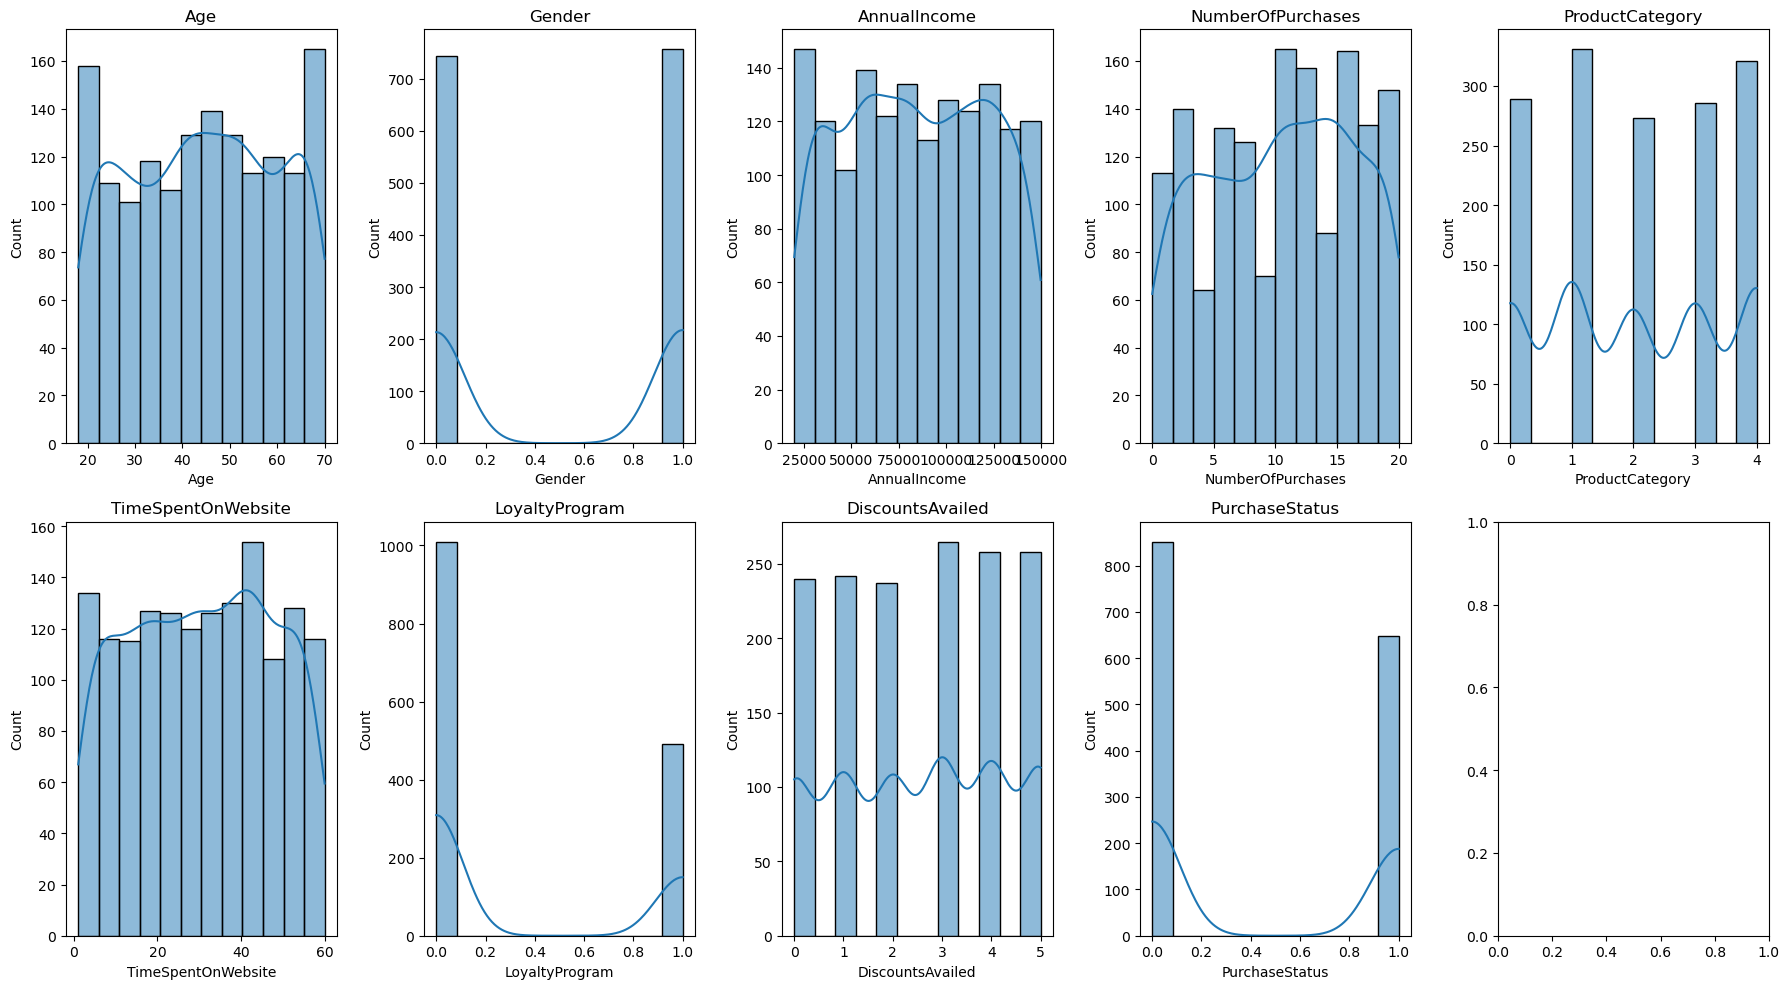

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

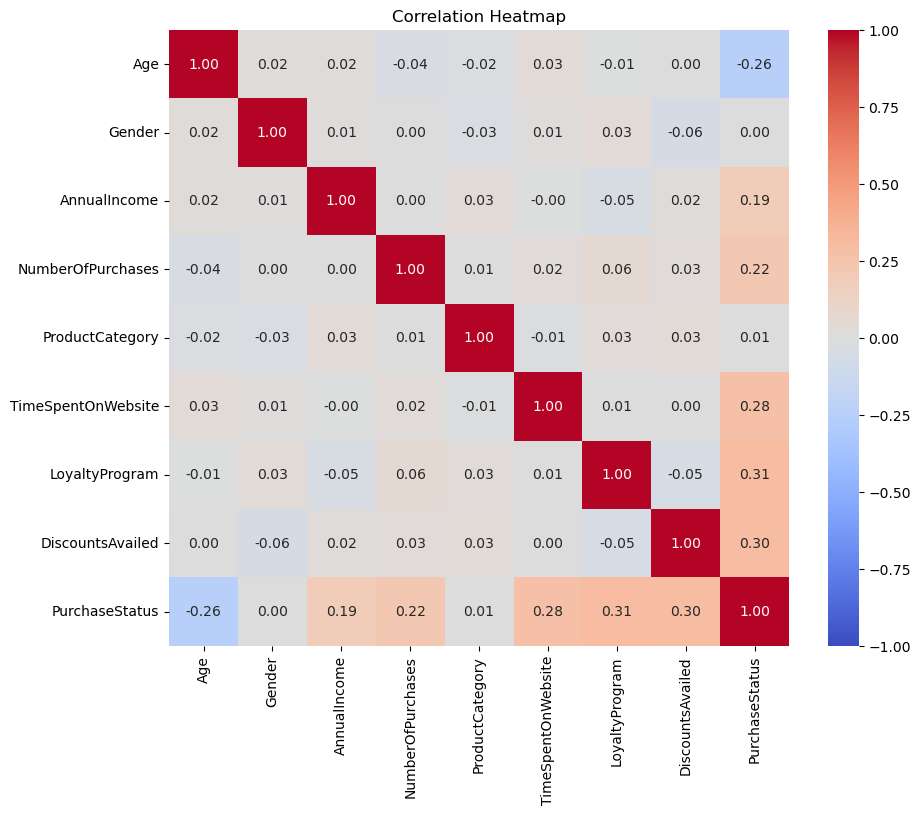

In [9]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
corr_purchase = corr_matrix["PurchaseStatus"].sort_values(ascending=False)
corr_purchase

PurchaseStatus        1.000000
LoyaltyProgram        0.310838
DiscountsAvailed      0.303297
TimeSpentOnWebsite    0.277112
NumberOfPurchases     0.222691
AnnualIncome          0.188214
ProductCategory       0.007346
Gender                0.002627
Age                  -0.255747
Name: PurchaseStatus, dtype: float64

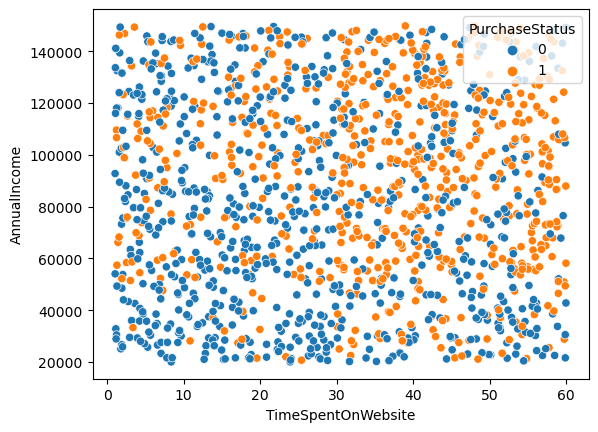

In [11]:
sns.scatterplot(data=df, x="TimeSpentOnWebsite", y="AnnualIncome", hue="PurchaseStatus")
plt.show()

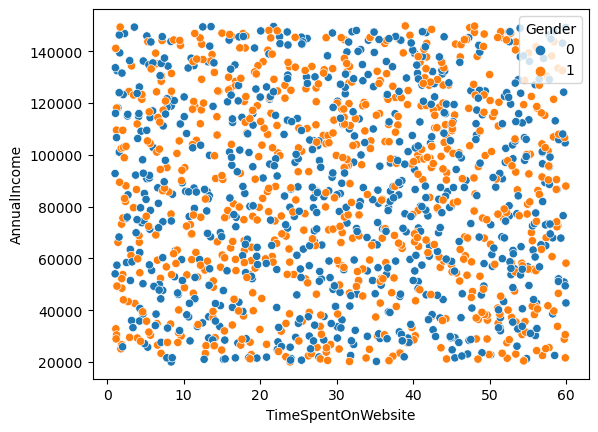

In [12]:
sns.scatterplot(data=df, x="TimeSpentOnWebsite", y="AnnualIncome", hue="Gender")
plt.show()

## Modeling

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
y = df["PurchaseStatus"]
X = df.drop(columns=["PurchaseStatus"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Random Forests

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_model = RandomForestClassifier(random_state=42)

In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [18]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

In [19]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [20]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score:  0.9377923514538559


In [21]:
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_pred_rf = best_rf_model.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred_rf)

0.944

In [23]:
confusion_matrix(y_test, y_pred_rf)

array([[212,   5],
       [ 16, 142]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       217
           1       0.97      0.90      0.93       158

    accuracy                           0.94       375
   macro avg       0.95      0.94      0.94       375
weighted avg       0.95      0.94      0.94       375



In [25]:
# Cross Validation

In [26]:
best_rf_scores = cross_val_score(best_rf_model, X_train, y_train, cv=10, scoring="accuracy")

In [27]:
print("Random Forest Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (best_rf_scores.mean(), best_rf_scores.std()))

Random Forest Cross-Validation Accuracy: 0.94 (+/- 0.02)


### Gradient Boosting (CatBoost)

In [28]:
from catboost import CatBoostClassifier

In [29]:
catb_model = CatBoostClassifier()

In [30]:
param_grid = {
    "iterations": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "depth": [4, 6, 8],
    "border_count": [32, 50, 100]
}

In [31]:
grid_search = GridSearchCV(catb_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

In [32]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
0:	learn: 0.6296861	total: 146ms	remaining: 14.4s
1:	learn: 0.5468208	total: 148ms	remaining: 7.28s
2:	learn: 0.4999171	total: 151ms	remaining: 4.87s
3:	learn: 0.4501881	total: 153ms	remaining: 3.68s
4:	learn: 0.4099304	total: 156ms	remaining: 2.96s
5:	learn: 0.3746897	total: 158ms	remaining: 2.47s
6:	learn: 0.3503845	total: 160ms	remaining: 2.13s
7:	learn: 0.3273439	total: 162ms	remaining: 1.86s
8:	learn: 0.3152057	total: 164ms	remaining: 1.66s
9:	learn: 0.3005698	total: 166ms	remaining: 1.5s
10:	learn: 0.2914904	total: 168ms	remaining: 1.36s
11:	learn: 0.2834920	total: 170ms	remaining: 1.24s
12:	learn: 0.2766534	total: 172ms	remaining: 1.15s
13:	learn: 0.2654131	total: 174ms	remaining: 1.07s
14:	learn: 0.2593563	total: 176ms	remaining: 996ms
15:	learn: 0.2545331	total: 177ms	remaining: 931ms
16:	learn: 0.2499689	total: 179ms	remaining: 875ms
17:	learn: 0.2444107	total: 180ms	remaining: 820ms
18:	learn: 0.2400783	total: 18

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000027C94732050>,
             n_jobs=-1,
             param_grid={'border_count': [32, 50, 100], 'depth': [4, 6, 8],
                         'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='accuracy', verbose=2)

In [33]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'border_count': 50, 'depth': 6, 'iterations': 100, 'learning_rate': 0.2}
Best Score:  0.9431099873577751


In [34]:
best_catb_model = CatBoostClassifier(**best_params)
best_catb_model.fit(X_train, y_train)

y_pred_catb = best_catb_model.predict(X_test)

0:	learn: 0.6296861	total: 929us	remaining: 92.1ms
1:	learn: 0.5468208	total: 1.91ms	remaining: 93.6ms
2:	learn: 0.4999171	total: 2.47ms	remaining: 79.9ms
3:	learn: 0.4501881	total: 3ms	remaining: 72.1ms
4:	learn: 0.4099304	total: 3.53ms	remaining: 67.1ms
5:	learn: 0.3746897	total: 4.07ms	remaining: 63.7ms
6:	learn: 0.3503845	total: 4.63ms	remaining: 61.5ms
7:	learn: 0.3273439	total: 5.18ms	remaining: 59.6ms
8:	learn: 0.3152057	total: 5.86ms	remaining: 59.2ms
9:	learn: 0.3005698	total: 6.4ms	remaining: 57.6ms
10:	learn: 0.2914904	total: 6.91ms	remaining: 55.9ms
11:	learn: 0.2834920	total: 7.44ms	remaining: 54.5ms
12:	learn: 0.2766534	total: 7.91ms	remaining: 52.9ms
13:	learn: 0.2654131	total: 8.41ms	remaining: 51.6ms
14:	learn: 0.2593563	total: 8.91ms	remaining: 50.5ms
15:	learn: 0.2545331	total: 9.44ms	remaining: 49.6ms
16:	learn: 0.2499689	total: 9.99ms	remaining: 48.8ms
17:	learn: 0.2444107	total: 10.5ms	remaining: 47.7ms
18:	learn: 0.2400783	total: 11ms	remaining: 46.7ms
19:	learn:

In [35]:
accuracy_score(y_test, y_pred_catb)

0.936

In [36]:
confusion_matrix(y_test, y_pred_catb)

array([[211,   6],
       [ 18, 140]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred_catb))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       217
           1       0.96      0.89      0.92       158

    accuracy                           0.94       375
   macro avg       0.94      0.93      0.93       375
weighted avg       0.94      0.94      0.94       375



### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=5) # Let's try 5 neighbors

In [40]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred_knn = knn_model.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred_knn)

0.6053333333333333

In [43]:
confusion_matrix(y_test, y_pred_knn)

array([[144,  73],
       [ 75,  83]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       217
           1       0.53      0.53      0.53       158

    accuracy                           0.61       375
   macro avg       0.59      0.59      0.59       375
weighted avg       0.60      0.61      0.60       375



In [45]:
# We've got a bad score, let's try to improve it by adjusting the parameters.

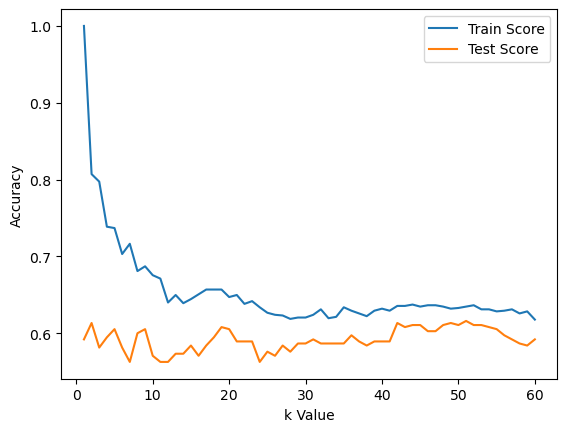

In [46]:
import matplotlib.pyplot as plt

k_range = range(1, 61)
train_scores = []
test_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(k_range, train_scores, label='Train Score')
plt.plot(k_range, test_scores, label='Test Score')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
param_grid = {
    "n_neighbors": [43],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2]
}

In [48]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, 
                           cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

In [49]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [43], 'p': [1, 2]},
             scoring='accuracy', verbose=2)

In [50]:
best_params = grid_search.best_params_
best_params

{'algorithm': 'auto', 'n_neighbors': 43, 'p': 1}

In [51]:
best_knn_model = grid_search.best_estimator_

In [52]:
y_pred_best_knn = best_knn_model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred_best_knn)

0.608

In [54]:
# Cross Validation

In [55]:
best_knn_scores = cross_val_score(best_knn_model, X_train, y_train, cv=10, scoring="accuracy")

In [56]:
print("KNN Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (best_knn_scores.mean(), best_knn_scores.std()))

KNN Cross-Validation Accuracy: 0.61 (+/- 0.04)


### Overfitting Check

In [57]:
train_score_rf = accuracy_score(y_train, best_rf_model.predict(X_train))
test_score_rf = accuracy_score(y_test, best_rf_model.predict(X_test))

print("RF Train Score: ", train_score_rf)
print("RF Test Score: ", test_score_rf)

RF Train Score:  0.9591111111111111
RF Test Score:  0.944


In [58]:
train_score_catb = accuracy_score(y_train, best_catb_model.predict(X_train))
test_score_catb = accuracy_score(y_test, best_catb_model.predict(X_test))

print("CatBoost Train Score: ", train_score_catb)
print("CatBoost Test Score: ", test_score_catb)

CatBoost Train Score:  0.9564444444444444
CatBoost Test Score:  0.936


In [59]:
train_score_knn = accuracy_score(y_train, best_knn_model.predict(X_train))
test_score_knn = accuracy_score(y_test, best_knn_model.predict(X_test))

print("KNN Train Score: ", train_score_knn)
print("KNN Test Score: ", test_score_knn)

KNN Train Score:  0.6364444444444445
KNN Test Score:  0.608


### Other Analysis

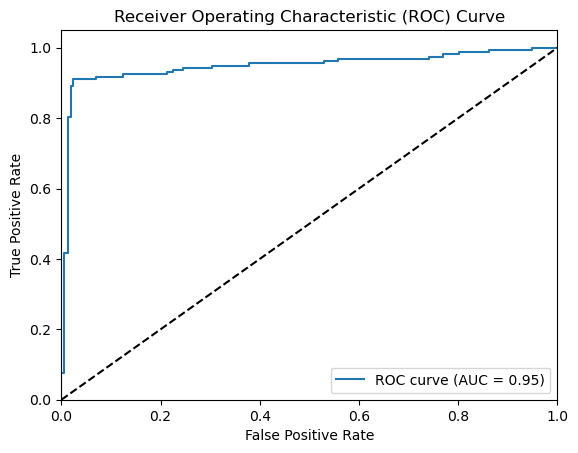

In [60]:
# ROC Curve and AUC

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

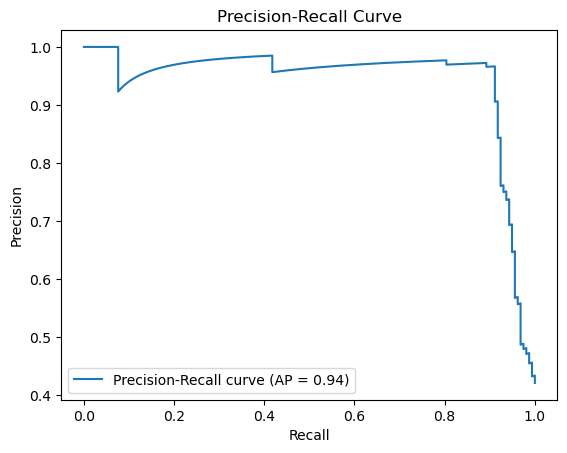

In [61]:
# Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, label=f"Precision-Recall curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

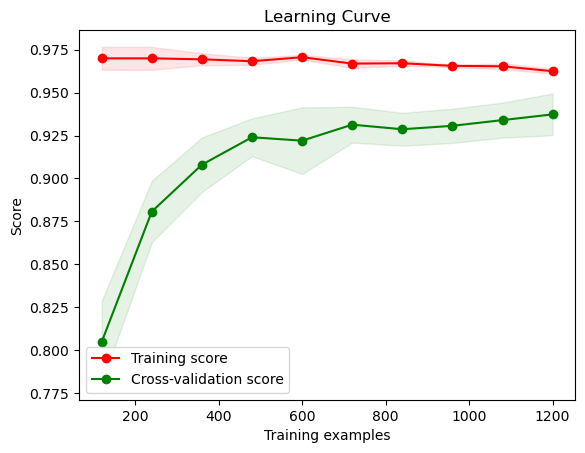

In [62]:
# Learning Curve

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [63]:
# Error Analysis

misclassified = X_test[y_test != y_pred_rf]

error_analysis_df = pd.DataFrame(misclassified, columns=X.columns)
error_analysis_df["Actual"] = y_test[y_test != y_pred_rf]
error_analysis_df["Predicted"] = y_pred_rf[y_test != y_pred_rf]

print(error_analysis_df)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
1161   43       0   76162.460587                 10                1   
1004   55       1  127216.620855                 16                1   
1425   31       1   82515.719058                  1                0   
239    18       1  118931.030054                  1                2   
482    49       0   57370.016437                  5                3   
997    46       1  108414.545108                  8                3   
1326   66       0   33767.754572                  3                3   
405    60       0   28128.418447                 18                0   
605    55       0  115749.579684                 10                4   
192    47       1   58647.802740                  6                0   
351    36       0   51446.197674                  6                3   
1144   67       0   40127.719638                 16                4   
976    64       1   55242.512989                  0             

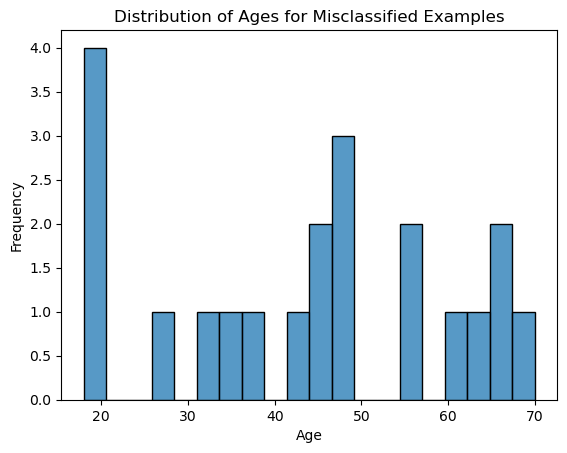

In [64]:
sns.histplot(error_analysis_df["Age"], kde=False, bins=20)
plt.title("Distribution of Ages for Misclassified Examples")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

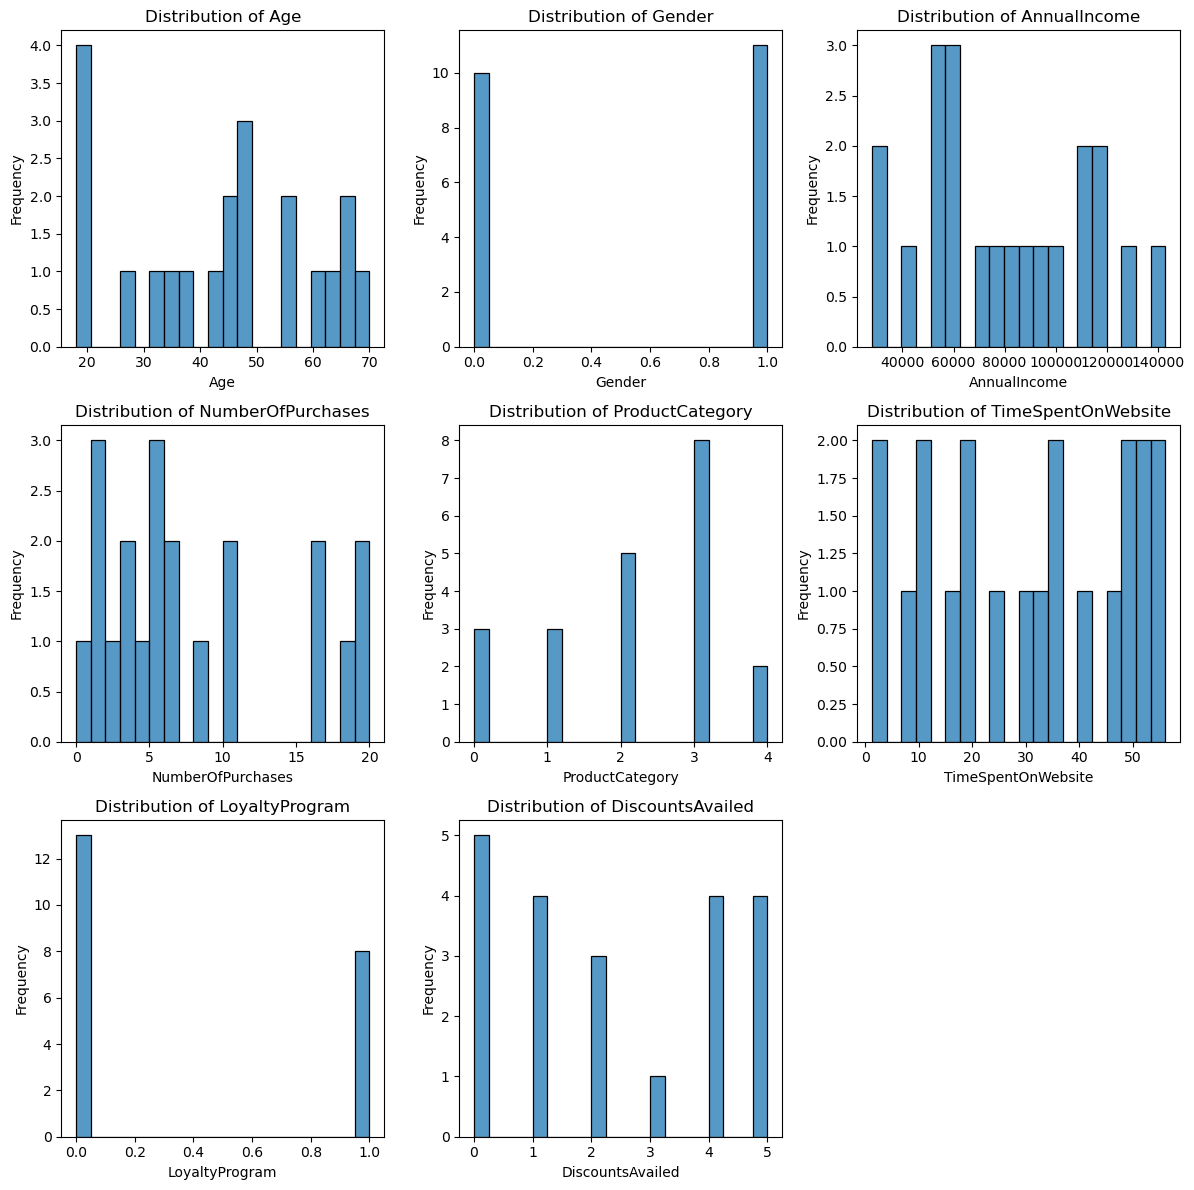

In [65]:
features = df.drop(columns=["PurchaseStatus"]).columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), sharex=False, sharey=False)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(error_analysis_df[feature], kde=False, bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

for i in range(len(features), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

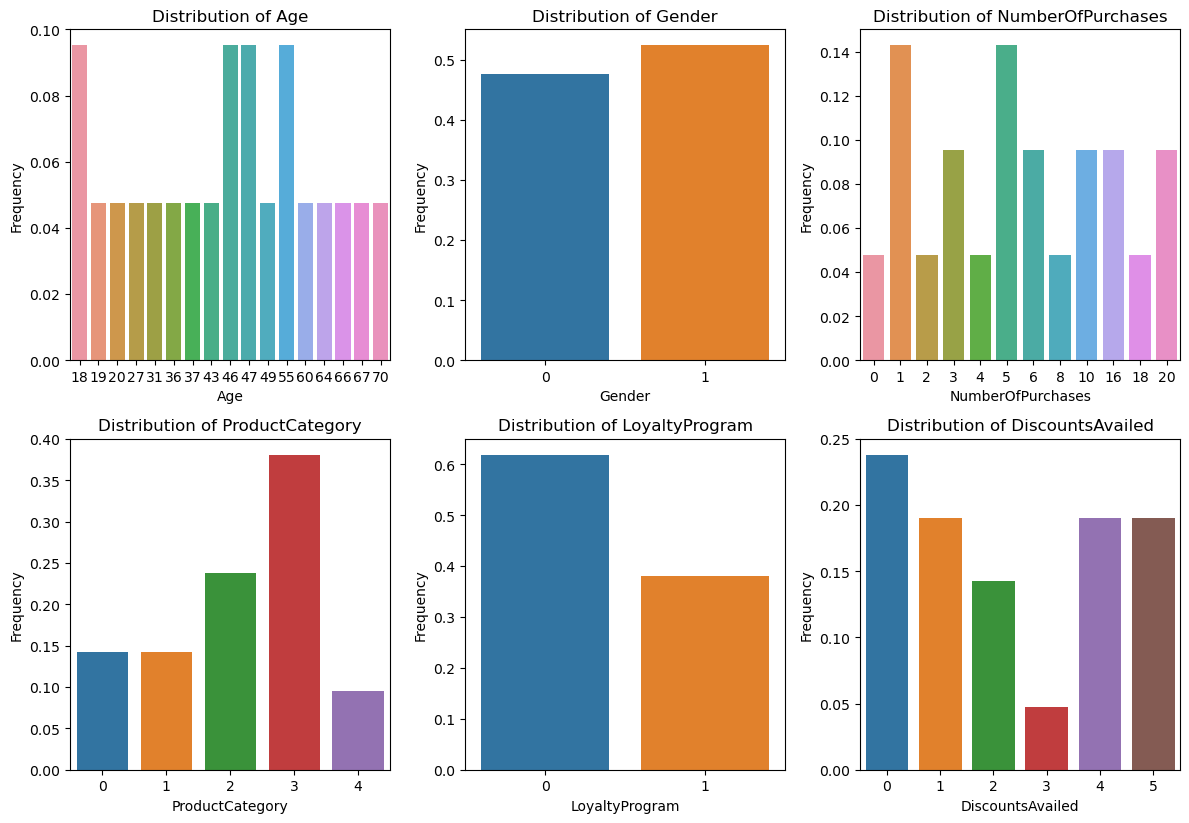

In [66]:
features = df.drop(columns=["PurchaseStatus", "AnnualIncome", "TimeSpentOnWebsite"]).columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), sharex=False, sharey=False)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    
    error_counts = error_analysis_df[feature].value_counts(normalize=True)
    
    sns.barplot(x=error_counts.index, y=error_counts.values, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

for i in range(len(features), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

### Prediction

In [67]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [68]:
data = (25, 0, 100.000, 7, 2, 20, 0, 0)
data_np = np.asarray(data)
data_reshape = data_np.reshape(1, -1)
prediction = best_rf_model.predict(data_reshape)
print(prediction)

[0]


In [69]:
data = (25, 0, 100.000, 7, 2, 200, 1, 0)
data_np = np.asarray(data)
data_reshape = data_np.reshape(1, -1)
prediction = best_rf_model.predict(data_reshape)
print(prediction)

[1]
